<h1><b> Final Project: Emotional Body Language in Golf <br>
COMS 4735 <br>
Aryn Davis; ald2223 </b> </h1>

<h2>Introduction:</h2>
<br>
I have been playing golf for the last 11 years of my life, and one thing that every instructor tells young golfers to do is manage their emotions and reactions while on the course. Even though you can sometimes see professional players explode on the course, they are usually very composed and show little emotion regarding a single shot. One of my favorite golfers since forever has been Tiger Woods, and he is known for being fairly composed while on the course. I will be creating a system to classify his resulting shot as either ‘good’ (fairway or green), ‘bad’ (1st or 2nd cut of rough, sand bunkers), or ‘horrible’ (in the trees, in the water, hazards, etc.), based on his body language, I believe that this is a valid visual interface. I don’t believe that this will be building upon prior work, but it will be similar in classification to the first assignment where we look at certain aspects of the pictures to decide what the picture represents.


<h2>Prior Works:</h2>
 <br>
In doing research on the intersection between computer vision and golf, I found that detecting emotion from body language is a fairly difficult since there isn't much body language-related content out there (Noroozi et al., 2018). This study in particular found that while people can easily determine what is happening geometrically, it is hard to go deeper into that and figure out the exact emotions being portrayed. They suggest that emotional body language analysis is way farther behind emotional facial expression analysis, due to the fact that there is no largely available datasets of body gestures classified with emotions to develop any models of. For this project, I agree that facial expression analysis would be more beneficial, and hopefully since I am using crude motion detection for my clips, I will not need as deep of analysis in the body movement to draw conclusions. 
 <br><br>
In another study, centered on video analysis of putting, they found that it is possible to detect and idetify signature aspects of the putt swing that are unique to each player (Couceiro et al., 2013). While I won't be directly working with the golf swing, this idea of identifying aspects of the swing could be useful in future iterations of this project. By being able to identify when a golfer is in the follow through of their swing, it could make the data for a project like this more constrained, as you can start data collection the minute the follow through has started, so that you know you are getting body movement related to perception of the shot and not accidentally collecting noise from other parts of the swing.
<br><br>
A third study I found, human pose estimations from static images prove a significant challenge due to the high degrees of freedom in the human body that shift meaning and the lack of efficiency in current algorithms (Gong et al., 2016). At the end of this paper, they also mention the difficulty of estimating human poses when some body parts are hidden from the image. I found the same to be slightly difficult when crowdsourcing predictions from my family. Since most golf footage is taken from behind or to the right of the player, some of their limbs are almost always concealed throughout the swing. In the follow through stance with a camera angle from the right side, when players are facing the way their ball was hit, you cannot see what their face or hands are doing in most cases. Because of this, when asking my family to classify a clip based on the body language, there were instances where the concealed view meant that my family couldn't come to the same conclusion of what emotion was being portrayed because they couldn't see the pose. Since that article points to algorithms being able to detect pose even with partial view of the body, I see that as an open challenge of great difficulty since humans have difficulty with the same task, making it even harder to establish and annotate the appropriate dataset to solve this challenge. 
<br><br> 
In this study, on pose estimation in golf, they found an accurate system to determine what stage of the swing a golfer is at with a fron facing camera (Park et al., 2017). This system is also 3D and can be used for identifying improper movement and posture during the swing. However, the detection functionality can be used in a similar way in this project as the Courceiro study, where propoerly identifying the correct position of the golf swing in data can make swing data much more constrained, even in tournament play where the emotional detection can be analyzed in a real world situation. 

<h2> Data: </h2>
<br>
Check this Google drive link in case videos got ruptured in zipping process: https://drive.google.com/drive/folders/1HyAJhHmEhKehpM5Gw3qajVOf-264nPKi?usp=sharing. 
<br>I got different shot videos and named them as such, representing tee shots, long iron approach shots (>140 yards from the pin), short game (bunkers, chips, or pitch shots), and putts. Each shot has a different type of follow-through routine, so I thought it would be helpful to look at each set of shots differently. This link also includes some examples of the processed videos (I couldn't get all of them because the OpenCV VideoWriter was giving me issues, so I had to screen record all of them which was difficult, but I got enough to show the gist), including the binarized video of different movements, the color video with rectangles around each relevant moving part, and the gray-scale video of the highlighted changes between each video frame.
<br>
<br>
In general, the data was very hard to collect. I screen recorded my clips from videos posted online from tournaments. Many tournaments focus more on the ball trajectory rather than the golfer, so I found many clips that didn't show Tiger's full response to his shot and would instead record how the ball was landing. Also, with the many camera angles provided in golf footage, often times after showing a full body swing, the cameras would switch to a close up of his face. These issues explains why some of my videos are just a second long, since I had to get only the body language before the camera switched to something else. I tried to get the most complete data that I could, and ended up getting the majority of the videos from one tournament, the 2018 PGA Championship because they had the most clear, most Tiger-focused footage that I could find. That tournament also had a video on YouTube of every single shot he had in the tournament, which was super helpful for getting data (this video: https://www.youtube.com/watch?v=ExiuB6wicus). I got a few other clips from other sources in there, but not too many. Overall, I got around 25 videos, at least 5 in each category and made sure there was at least one video representing the 3 classes I assigned.  
<br> 
<br>
Another aspect of getting data was cutting out the noise, at first I had the videos show Tiger's full swing, but then I figured that that was irrelevant to this project, since he only reacts to the shot after he has followed through and hit the ball, so I don't need all of the motion to potentially ruin my motion estimator. Some clubs are bigger than others, so including the swing will also have introduced more noise since the same swing but with more clubhead will make it seem like there was more movement for him, when that is not necessarily the case. Also, when Tiger plays in tournaments, he is surrounded by crowds of people who are very active spectators. In clips where the crowd was fairly close to him, when he hit a shot people would instantly move to try to see when it will land. This also introduced a fair bit of noise, which I included in the code to ignore, but I also had to go through and make the window of my recordings smaller. In most cases, I had to take multiple screen recordings of the same shot with different clip sizes and times in order to get the cleanest version of his body language that I could. 

<h2> Code: </h2>
<br>
For my overarching plan of attack for this project, I first thought that the time he spent starting at the ball would be a huge indicator of how he felt about the shot, but after looking at the values from my motion detector, I found that it was the amount of movement after the shot that was the most valuable. And with each shot, the idea of 'goodness' and how long he would look at a shot varied. 
<br><br>
So I found a tutorial online to do motion detection of a video in OpenCV here: https://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/ (I think I have permission to use this since it is an tutorial for detection on an open source package.) And from there I modified it for video rather than webcam streaming. For each frame in the video, the algorithm will detect contours by looking at the change in pixels between the first frame and the current frame, binarizes on that difference and then loops through all of the contours present to place rectangles around them. I keep track of the total difference in pixels between the first frame and the current frame and the amount of pixels that differ between the current frame and the previous frame. With these two metrics, I want to see both how much movement overall took place, but also how little movement happened between frames. I want both of these because from looking at the videos, my initial assumptions about how he interprets full swing shots were somewhat right. He tends to move to a resting position and then stare on bad shots because he is trying to keep track of where they land, with good shot, he tends to move quickly out of his swing because he knows it'll land where he wants, and with horrible shots he tends to stare down with some additional movements to express frustration. The only category that didn't seem to fit this was the longiron shots. I suspect this because with these shots, he wants to get as close to the hole as possible and he is usually on the fairway or a first cut of the rough that would make this accessible (as opposed to short game, where he could be in a bunker or deep rough that would lessen his expectations slightly), and so with these he tends to do the opposite, quickly move from horrible shots, stare + move at bad shots, and stare down good shots. And on putts, it follows somewhat similar patterns, with bad putts (putts where he barely missed the hole) he stares it down in almost disbelief for a touch longer, while on good putts he watches it go into the hole and celebrates with a fist pump, and on horrible putts (putts where he missed the hole by over 1 ft) he tends to move quickly to either mark it or putt it in. 
<br><br>
From these new observations, I can then tell if the total movement or minimum amount of movement is a good measure for a group of shots. For putts, long irons, and tee shots, it was better to use minimum movement, since it provided a better binary to whether he was staring at a shot or moving toward it/making frustrated gestures, which is easy to distinguish along since stare down would result in a smaller minimum than moving hectic. For short game, I found it more beneficial to use total movement, but I am not quite sure why. I discovered it during tuning the system when testing the different metrics. If I had to guess, I would say it was because short game has a smaller ranges of movement because you are so close to the hole and so the body language cues are smaller because you have to pay attention to how the green is sloping. But that's not a guarantee. 


In [283]:
#displaying my assigned truth values!!!!

#open my truths file for reading
p = open("truth.txt", "r")
truths = {}
if p.mode == 'r':
    #take each line in file and read it 
    #store them in a dictionary so that i can use them for testing later
    for line in p:
        (key, val) = line.split()
        print(key,val)
        truths[key] = val
print()
print(truths)
p.close()

tee1 good
tee2 bad
tee3 horrible
tee4 horrible
tee5 good
tee6 bad
tee7 good
longiron1 good
longiron2 horrible
longiron3 bad
longiron4 good
longiron5 horrible
longiron6 bad
short1 good
short2 horrible
short3 bad
short4 bad
short5 good
short6 bad
short7 horrible
putt1 horrible
putt2 good
putt3 good
putt4 good
putt5 bad

{'tee1': 'good', 'tee2': 'bad', 'tee3': 'horrible', 'tee4': 'horrible', 'tee5': 'good', 'tee6': 'bad', 'tee7': 'good', 'longiron1': 'good', 'longiron2': 'horrible', 'longiron3': 'bad', 'longiron4': 'good', 'longiron5': 'horrible', 'longiron6': 'bad', 'short1': 'good', 'short2': 'horrible', 'short3': 'bad', 'short4': 'bad', 'short5': 'good', 'short6': 'bad', 'short7': 'horrible', 'putt1': 'horrible', 'putt2': 'good', 'putt3': 'good', 'putt4': 'good', 'putt5': 'bad'}


In [284]:
#displaying crowdsourced values!!!!

#open my crowd file for reading
p = open("crowd.txt", "r")
crowd = {}
if p.mode == 'r':
    #take each line in file and read it 
    #store these also in a dictionary for more accuracy testing 
    for line in p:
        (key, val1, val2, val3) = line.split()
        print(key,val1, val2, val3)
        crowd[key] = [val1,val2,val3]
print()
print(crowd)
p.close()

tee1 good good bad
tee2 good good good
tee3 bad horrible horrible
tee4 horrible horrible horrible
tee5 good good good
tee6 horrible horrible bad
tee7 good good good
longiron1 bad good bad
longiron2 bad bad good
longiron3 horrible horrible bad
longiron4 good good good
longiron5 horrible horrible bad
longiron6 horrible horrible horrible
short1 good good good
short2 bad horrible horrible
short3 good bad good
short4 horrible horrible bad
short5 good bad good
short6 bad good good
short7 horrible horrible bad
putt1 bad bad good
putt2 good good good
putt3 good good good
putt4 bad good good
putt5 bad bad horrible

{'tee1': ['good', 'good', 'bad'], 'tee2': ['good', 'good', 'good'], 'tee3': ['bad', 'horrible', 'horrible'], 'tee4': ['horrible', 'horrible', 'horrible'], 'tee5': ['good', 'good', 'good'], 'tee6': ['horrible', 'horrible', 'bad'], 'tee7': ['good', 'good', 'good'], 'longiron1': ['bad', 'good', 'bad'], 'longiron2': ['bad', 'bad', 'good'], 'longiron3': ['horrible', 'horrible', 'bad'], 'l

In [285]:
#code to show how to display a video 
import cv2
import numpy as np
import imutils

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('short1-change.avi')

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
    # Display the resulting frame
        cv2.imshow('Frame',frame)
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
  # Break the loop
    else: 
        break
# When everything done, release the video capture object
cap.release()

 

# Closes all the frames
cv2.destroyAllWindows()


In [288]:
#code to get the values needed to interpret body language
def get_bodylang(filename):
    #get video file 
    vs = cv2.VideoCapture(filename)
   
    # initialize the first frame in the video stream
    firstFrame = None
    prev = None
    #declare values to measure total movement from first frame and frame by frame movements 
    totalMotion = 0
    framebyframe = []
    # loop over the frames of the video
    while True:
        # grab the current frame and initialize the occupied/unoccupied
        # text
        frame = vs.read()
        frame = frame[1]
        text = "Unoccupied"
        # if the frame could not be grabbed, then we have reached the end
        # of the video
        if frame is None:
            break
        # resize the frame, convert it to grayscale, and blur it
        frame = imutils.resize(frame, width=500)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (21, 21), 0)
        # if the first frame is None, initialize it and make it the prev frame too
        if firstFrame is None:
            firstFrame = gray
            prev = gray
            continue
        # compute the absolute difference between the current frame and
        # first frame
        frameDelta = cv2.absdiff(firstFrame, gray)
        #append sum of diff pixels between current frame and previous frame
        framebyframe.append(cv2.absdiff(prev, gray).sum())
        thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
        # dilate the thresholded image to fill in holes, then find contours
        # on thresholded image
        thresh = cv2.dilate(thresh, None, iterations=2)
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        # loop over the contours
        for c in cnts:
            # if the contour is too small, ignore it
            if cv2.contourArea(c) < 4000:
                continue
            # keep track of total motion that has happend for each frame
            totalMotion += cv2.absdiff(firstFrame, gray).sum()
            # compute the bounding box for the contour, draw it on the frame,
            # and update the text
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # show the frame and record if the user presses a key
       
        cv2.imshow("With color", frame)
        cv2.imshow("Binarized", thresh)
        cv2.imshow("Frame Delta", frameDelta)
        
        key = cv2.waitKey(1) & 0xFF
        # if the `q` key is pressed, break from the loop
        if key == ord("q"):
            break
        #make your current frame now the previous frame for the next iteration
        prev = frameDelta
    # cleanup the camera and close any open windows
    vs.release()
    cv2.destroyAllWindows()
    #print the values you found in both metrics
    print('Total difference btw first and last frame:', totalMotion )
    print('For each frame by frame difference, here is the max difference:', max(framebyframe),
          ', min difference:', min(framebyframe),
          ', average distance:', sum(framebyframe)/len(framebyframe), 
          ', sum of differences:', sum(framebyframe), '\n')
    # return both metrics
    return totalMotion, min(framebyframe)



In [289]:
#code to loop through all videos and get their predictions

#the amount of videos in each category
sizeShort = 7
sizeTee = 7
sizeLong = 6
sizePutt = 5
#dictionaries to hold predictions and sort values for comparison
short_summary = {}
long_summary = {}
putt_summary = {}
tee_summary = {}
predicts = {}

#loop through each of the videos in a certain category 
for i in range(1,sizeShort+1):
    #create filename from number and description
    filename = 'short'+ str(i)+'.mov'
    #print what I'm aiming for
    print('short'+str(i), truths['short'+str(i)])
    #get the two metrics returned below
    summ, minf = get_bodylang(filename)
    # assign the appropriate one per shot
    short_summary['short'+str(i)] = summ
#sort the values based on their metric
sorted_summ = sorted((value, key) for (key,value) in short_summary.items())
print('Total distance per shot, sorted:' , sorted_summ)
#loop through the sorted values and assign them based on relative position
for item in range(0, len(sorted_summ)):
    # 2 smallest get 'good'
    if item < 2:
        predicts[sorted_summ[item][1]] = 'good'
    # 2 largest get 'horrible'
    elif item > 4:
        predicts[sorted_summ[item][1]] = 'horrible'
    # whatever is in the middle gets 'bad'
    else:
        predicts[sorted_summ[item][1]] = 'bad'
print()

#same logic for the rest, 
#just with the different categories and different cutoffs 
#based on how many videos are in each category

#tee shots
for i in range(1,sizeTee+1):
    filename = 'tee'+ str(i)+'.mov'
    print('tee'+str(i), truths['tee'+str(i)])
    summ, minf = get_bodylang(filename)
    tee_summary['tee'+str(i)] = minf
sorted_summ = sorted((value, key) for (key,value) in tee_summary.items())
print('Minimum distance per shot, sorted:' , sorted_summ)
for item in range(0, len(sorted_summ)):
    if item < 3:
        predicts[sorted_summ[item][1]] = 'good' 
    elif item > 4:
        predicts[sorted_summ[item][1]] = 'horrible'
    else:
        predicts[sorted_summ[item][1]] = 'bad'
print()

#long irons 
for i in range(1,sizeLong+1):
    filename = 'longiron'+ str(i)+'.mov'
    print('longiron'+str(i), truths['longiron'+str(i)])
    summ, minf = get_bodylang(filename)
    long_summary['longiron'+str(i)] = minf
sorted_summ = sorted((value, key) for (key,value) in long_summary.items())
print('Minimum distance per shot, sorted:' , sorted_summ)
for item in range(0, len(sorted_summ)):
    if item < 2:
        predicts[sorted_summ[item][1]] = 'horrible' 
    elif item > 3:
        predicts[sorted_summ[item][1]] = 'good'
    else:
        predicts[sorted_summ[item][1]] = 'bad'
print()

#putts
for i in range(1,sizePutt+1):
    filename = 'putt'+ str(i)+'.mov'
    print('putt'+str(i), truths['putt'+str(i)])
    summ, minf = get_bodylang(filename)
    putt_summary['putt'+str(i)] = minf
sorted_summ = sorted((value, key) for (key,value) in putt_summary.items())
print('Minimum distance per shot, sorted:' , sorted_summ)
for item in range(0, len(sorted_summ)):
    if item < 1:
        predicts[sorted_summ[item][1]] = 'bad' 
    elif item > 3:
        predicts[sorted_summ[item][1]] = 'horrible'
    else:
        predicts[sorted_summ[item][1]] = 'good'

short1 good
Total difference btw first and last frame: 57389022.0
For each frame by frame difference, here is the max difference: 32094341 , min difference: 132874 , average distance: 30296385.933333334 , sum of differences: 908891578.0 

short2 horrible
Total difference btw first and last frame: 2050764219.0
For each frame by frame difference, here is the max difference: 37275310 , min difference: 122905 , average distance: 34627608.502702706 , sum of differences: 6406107573.0 

short3 bad
Total difference btw first and last frame: 813388766.0
For each frame by frame difference, here is the max difference: 56875153 , min difference: 634875 , average distance: 52680998.98648649 , sum of differences: 3898393925.0 

short4 bad
Total difference btw first and last frame: 1149296603.0
For each frame by frame difference, here is the max difference: 24151140 , min difference: 9561 , average distance: 21997969.944186047 , sum of differences: 4729563538.0 

short5 good
Total difference btw firs

<h3> Note: </h3>
When I first saw the values for each category of shots, I was not sure if I should have made concrete cutoffs for each classification or more relative cutoffs for each classification. But I ended up using relative cutoffs because shots are measured relative to each other for a player all the time. If you are a golfer that always hits the fairways, like Tiger, hitting a shot in the rough is a bad shot. And in general golf shots are relative, if you hit a shot further than your competitor, but it is in the water hazard, hitting that shot longer was not a good thing. That is why golf is about placement and accuracy rather than yardage. Also, this applies to emotional responses. When you have a shot that is bad, but it is earlier in the round, you are more likely to let that shot roll off your back. Later in the round, that bad shot may become more frustrating, so the body language may be more exaggerated. Also, once I made the charts below, I saw how different the values were for each category, so that meant that I would have to come up with 4 sets of cutoffs, which seemed too labor intensive for me. 
<br><br>

Also, I got help making the box plots from this link: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ and I think that I have permission to use this because it is a tutorial on how to create boxplots from a widely used python package, it didn't aid directly in any analysis at all. 

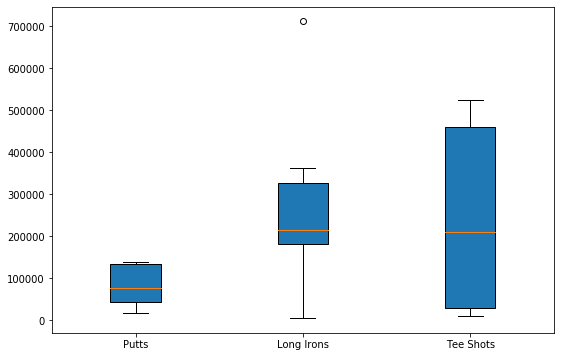

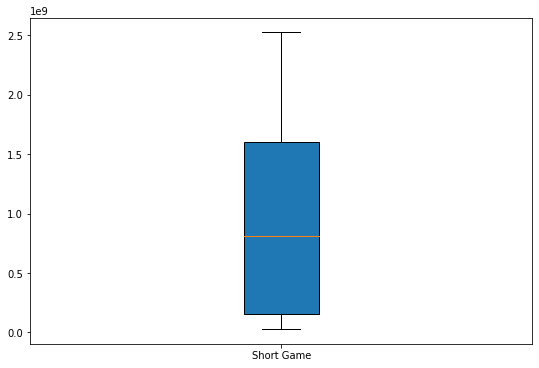

In [290]:
import matplotlib.pyplot as plt
import numpy as np
#i want to visualize my data

#make each set of summaries integers instead of strings 
short = [ int(x) for x in short_summary.values() ]
tee = [ int(x) for x in tee_summary.values() ]
putt = [ int(x) for x in putt_summary.values() ]
long = [ int(x) for x in long_summary.values() ]
summaries = [putt,long,tee]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
ax.boxplot(summaries, patch_artist=True)
ax.set_xticklabels(['Putts', 'Long Irons', 'Tee Shots'])
plt.show()

fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
ax.boxplot(short, patch_artist=True)
ax.set_xticklabels(['Short Game'])
plt.show()

<h2> Evaluation: </h2>
<br>
I evaluated my system by comparing its results/predictions against the ‘true’ metric of a shot that I assigned to each video. I will give each clip an indication if the resulting shot was ‘good’, ‘bad’, or ‘horrible’. And within the groups of videos, I hoped to have my system classify at least 80% of the videos with the same label that I gave them, but it ended up being more like 70% with each category having at least 60%, which I wouldn't say is too bad. I also tuned to this measure so at my first run it was around 12/25 (48%) overall and I improved it by playing with the metrics and messing which the classifications relative to each other based on the behavior I observed (explained in the 'Code' portion). These behaviorss mapped really well onto the actual data in a way that was surprising given that my data was limited and fairly unconstriained, which could have picked up a bunch of noise and made it difficult to draw any conclusions. Even in some cases where I wasn't sure that the conputer would be able to classify it correctly because the video was short and didn't seem to have much to draw a conclusion from, like tee5.mov, or the video had movements that could have easily been classified as a different label, like tee6.mov, were still classified correctly. I think in most cases, the two videos deemed incorrectly labeled by my algorithm just had to be switched and it would have been correct. 
<br><br>
I also surveyed my parents and family members who also play golf and see if they can give a metric of ‘good’, ‘bad’, or ‘horrible’ to each shot as well, but just based on the body language clips alone, so that I can see if my system could be as good as humans. I explained to them the movements I attributed to each class and let them watch the clips. I took 3 'guesses' from my family to see what they though of the body language. It was interesting, because based off of the body language alone, many of my family members guesses were far off from my truth assessments. While some clips were obvious that he was happy or frustrated, some of them were ambiguous, and it confused my family members. Overall, the accuracy between my system and the crowdsourcing was around 43%, which is not that great. But when I was thinking about how bad my family's predictions were, I wanted to see how they related to the truth values as well. Their accuracy was around 57% which wasn't too far from the system's accuracy. I guess one could say that this system was almost as good as a crowd that had to make decisions from limited scope as well. 
<br><br>
This just goes to show that because he keeps a tight leash on his emotions on the course, Tiger is very hard to read to humans and computers. I also suspect that his general attitude for the day or the way he is currently playing the round can affect the precision in what his body language means, since I found that in clips from later parts of the tournament he was more expressive, which may have indicated frustration. I also tuned my system to my truth values, and since my family members were often diverged from my assigned values, that could explain some of the discrepancy as well.



In [291]:
# compare with truth values
print('Predicted values:', predicts)
print()
print('Assigned truth values:', truths)

correct = 0
for result in predicts:
    if predicts[result] == truths[result]:
        correct += 1
    else:
        print('incorrect value:',result)
print()
print('Your system got', str(correct), 'predictions right out of', str(len(predicts)))

Predicted values: {'short7': 'good', 'short1': 'good', 'short6': 'bad', 'short3': 'bad', 'short4': 'bad', 'short2': 'horrible', 'short5': 'horrible', 'tee5': 'good', 'tee1': 'good', 'tee7': 'good', 'tee6': 'bad', 'tee3': 'bad', 'tee2': 'horrible', 'tee4': 'horrible', 'longiron5': 'horrible', 'longiron2': 'horrible', 'longiron4': 'bad', 'longiron3': 'bad', 'longiron1': 'good', 'longiron6': 'good', 'putt4': 'bad', 'putt2': 'good', 'putt5': 'good', 'putt3': 'good', 'putt1': 'horrible'}

Assigned truth values: {'tee1': 'good', 'tee2': 'bad', 'tee3': 'horrible', 'tee4': 'horrible', 'tee5': 'good', 'tee6': 'bad', 'tee7': 'good', 'longiron1': 'good', 'longiron2': 'horrible', 'longiron3': 'bad', 'longiron4': 'good', 'longiron5': 'horrible', 'longiron6': 'bad', 'short1': 'good', 'short2': 'horrible', 'short3': 'bad', 'short4': 'bad', 'short5': 'good', 'short6': 'bad', 'short7': 'horrible', 'putt1': 'horrible', 'putt2': 'good', 'putt3': 'good', 'putt4': 'good', 'putt5': 'bad'}
incorrect value: s

In [292]:
#compare with crowdsourced values 
print('Predicted values:',predicts)
print()
print('Crowdsourced values:', crowd)

correct = 0
for result in crowd:
    for vals in crowd[result]:
        if predicts[result] == vals:
            correct+=1

print()
print('Your system got', str(correct), 'predictions right out of', str(len(predicts)*3))

Predicted values: {'short7': 'good', 'short1': 'good', 'short6': 'bad', 'short3': 'bad', 'short4': 'bad', 'short2': 'horrible', 'short5': 'horrible', 'tee5': 'good', 'tee1': 'good', 'tee7': 'good', 'tee6': 'bad', 'tee3': 'bad', 'tee2': 'horrible', 'tee4': 'horrible', 'longiron5': 'horrible', 'longiron2': 'horrible', 'longiron4': 'bad', 'longiron3': 'bad', 'longiron1': 'good', 'longiron6': 'good', 'putt4': 'bad', 'putt2': 'good', 'putt5': 'good', 'putt3': 'good', 'putt1': 'horrible'}

Crowdsourced values: {'tee1': ['good', 'good', 'bad'], 'tee2': ['good', 'good', 'good'], 'tee3': ['bad', 'horrible', 'horrible'], 'tee4': ['horrible', 'horrible', 'horrible'], 'tee5': ['good', 'good', 'good'], 'tee6': ['horrible', 'horrible', 'bad'], 'tee7': ['good', 'good', 'good'], 'longiron1': ['bad', 'good', 'bad'], 'longiron2': ['bad', 'bad', 'good'], 'longiron3': ['horrible', 'horrible', 'bad'], 'longiron4': ['good', 'good', 'good'], 'longiron5': ['horrible', 'horrible', 'bad'], 'longiron6': ['horrib

In [293]:
#compare truth values with crowdsourced values
#how good are people at predicting body language?

print('Assigned truth values:',truths)
print()
print('Crowdsourced values:', crowd)

correct = 0
for result in crowd:
    for vals in crowd[result]:
        if truths[result] == vals:
            correct+=1

print()
print('Your family got', str(correct), 'assigned values correct right out of', str(len(truths)*3), 'attempts')

Assigned truth values: {'tee1': 'good', 'tee2': 'bad', 'tee3': 'horrible', 'tee4': 'horrible', 'tee5': 'good', 'tee6': 'bad', 'tee7': 'good', 'longiron1': 'good', 'longiron2': 'horrible', 'longiron3': 'bad', 'longiron4': 'good', 'longiron5': 'horrible', 'longiron6': 'bad', 'short1': 'good', 'short2': 'horrible', 'short3': 'bad', 'short4': 'bad', 'short5': 'good', 'short6': 'bad', 'short7': 'horrible', 'putt1': 'horrible', 'putt2': 'good', 'putt3': 'good', 'putt4': 'good', 'putt5': 'bad'}

Crowdsourced values: {'tee1': ['good', 'good', 'bad'], 'tee2': ['good', 'good', 'good'], 'tee3': ['bad', 'horrible', 'horrible'], 'tee4': ['horrible', 'horrible', 'horrible'], 'tee5': ['good', 'good', 'good'], 'tee6': ['horrible', 'horrible', 'bad'], 'tee7': ['good', 'good', 'good'], 'longiron1': ['bad', 'good', 'bad'], 'longiron2': ['bad', 'bad', 'good'], 'longiron3': ['horrible', 'horrible', 'bad'], 'longiron4': ['good', 'good', 'good'], 'longiron5': ['horrible', 'horrible', 'bad'], 'longiron6': ['h

<h2> Reflection: </h2>
<br>
This project showed me how difficult it is to try to detect emotional body language, even for humans. In my proposal, I was thinking that my system would be able to achieve 80% accuracy, but even the humans couldn't get that accuracy from small clips.  Tiger was also probably the wrong subject for this project also, since he has been known for being very stoic during his playing. He rarely talks to his competitors and stays laser-focused for the whole round. If I had done another player like Phil Mickleson, who is more open on the course and is extremely expressive, maybe some things would have changed. Also, body movement is not the only way to measure body language, but I think it would be interesting to also look at facial expressions. That would be very difficult in a golf setting, but I am willing to bet that facial expressions may be a better way to predict emotions than body movement would. 
<br><br>
I think that if I were to take this project one step forward, I would collect a lot more data and use some machine learning and compare the accuracy results from that with this system's. I am interested in this idea of 'predicting' human behavior, but as we can see from some of these results and some of the discussions, human behavior is varying on a multitude of factors. I believe that the small amounts of data I had kept me from noticing a pattern in the values, not just what I observed myself in the videos. I also think that the idea of tuning to the truth versus general consensus was interesting because it shows how there are some things that are not easily explainable with equations and values for humans but are still predicted with high confidence. 

<h2> References: </h2>
<br>

Couceiro, M.S., Portugal, D., Gonçalves, N. et al. A methodology for detection and estimation in the analysis of golf putting. Pattern Anal Applic 16, 459–474 (2013). https://doi-org.ezproxy.cul.columbia.edu/10.1007/s10044-012-0276-8
<br><br>
Gong, W.; Zhang, X.; Gonzàlez, J.; Sobral, A.; Bouwmans, T.; Tu, C.; Zahzah, E.-H. Human Pose Estimation from Monocular Images: A Comprehensive Survey. Sensors 2016, 16, 1966. https://www.mdpi.com/1424-8220/16/12/1966
<br><br>
Noroozi, F., Kaminska, D., Corneanu, C., Sapinski, T., Escalera, S., & Anbarjafari, G. (2018). Survey on emotional body gesture recognition. IEEE transactions on affective computing. https://ieeexplore-ieee-org.ezproxy.cul.columbia.edu/stamp/stamp.jsp?tp=&arnumber=8493586&isnumber=5520654 
<br><br>
Park, S., Yong Chang, J., Jeong, H., Lee, J. H., & Park, J. Y. (2017). Accurate and efficient 3d human pose estimation algorithm using single depth images for pose analysis in golf. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition Workshops (pp. 49-57). http://openaccess.thecvf.com/content_cvpr_2017_workshops/w2/papers/Park_Accurate_and_Efficient_CVPR_2017_paper.pdf
